In [8]:
import gpflow

In [9]:
import numpy as np
print np.log(3.5)

1.252762968495368


In [10]:
l1 = gpflow.priors.LogNormal(mu= -1.6, var = 0.05)
l2 = gpflow.priors.LogNormal(mu = -1.5, var = 0.25)
v1 = gpflow.priors.Gaussian(mu = 3.5, var = 0.5)
#v1 = gpflow.priors.LogNormal(mu = 1.25, var = 0.25)
v2 = gpflow.priors.Gaussian(mu = 0.1, var = 0.05)
mu = gpflow.priors.Gaussian(0, 0.5)

In [11]:
v1_vec = np.array([])
v2_vec = np.array([])
l1_vec = np.array([])
l2_vec = np.array([])
mu_vec = np.array([])
for i in xrange(1000):
    l1.randomize()
    l2.randomize()
    v1.randomize()
    v2.randomize()
    mu.randomize()
    l1r = l1.sample()
    l2r = l2.sample()
    v1r = v1.sample()
    v2r = v2.sample()
    mur = mu.sample()
    v1_vec = np.append(v1_vec,v1r)
    v2_vec = np.append(v2_vec, v2r)
    l1_vec = np.append(l1_vec, l1r)
    l2_vec = np.append(l2_vec, l2r)
    mu_vec = np.append(mu_vec, mur)    

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline

Text(0.5,1,u'mu')

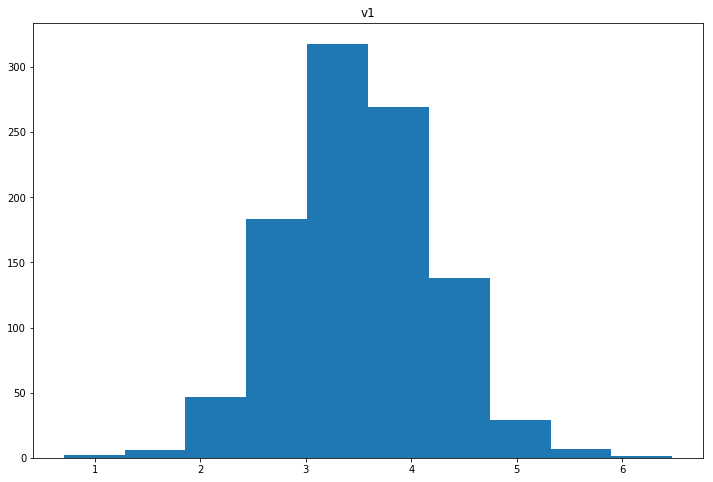

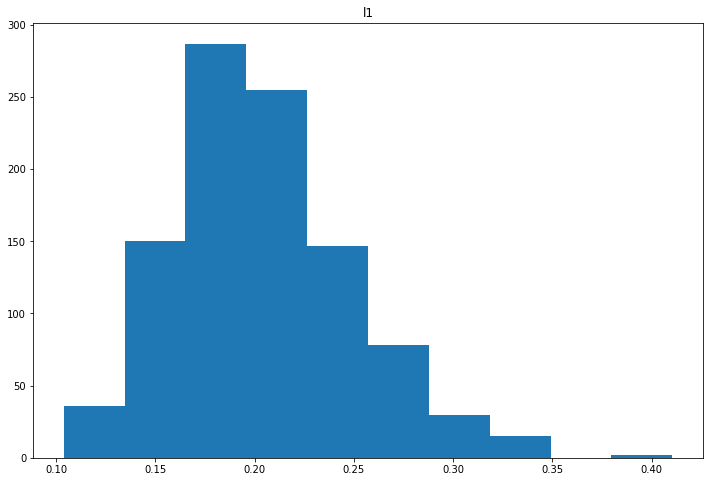

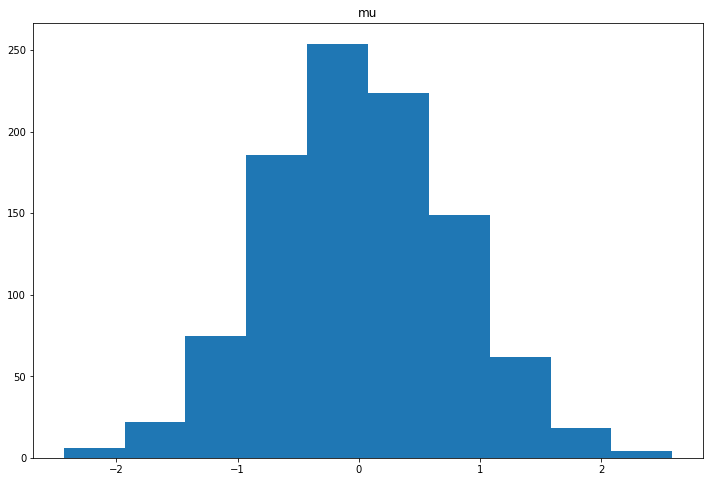

In [13]:
plt.figure(figsize= (12,8))
plt.hist(v1_vec)
plt.title('v1')
#plt.figure(figsize= (12,8))
#plt.hist(v2_vec)
#plt.title('v2')
plt.figure(figsize= (12,8))
plt.hist(l1_vec)
plt.title('l1')
plt.figure(figsize= (12,8))
#plt.hist(l2_vec)
#plt.title('l2')
#plt.figure(figsize= (12,8))
plt.hist(mu_vec)
plt.title('mu')

# GP Priors

In [14]:
from gpflow.param import Param, DataHolder

In [15]:
import sys
sys.path.append('../')
from SynOccupant import datagen

In [16]:
config_file = '../config_files/thermal_config.json'

In [17]:
x = np.linspace(20,27, 100)
DG = datagen.ThermalPrefDataGen(config_file)

In [18]:
xnorm = DG.normalize1D(x)

In [19]:
X = DataHolder(xnorm)

In [20]:
from GPPref import mean_func

In [21]:
GaussMean = mean_func.Normal(mu = 0, lengthscale = 0.05, signal_variance = 3.5)

In [24]:
GaussMean.lengthscale = 0.2
GaussMean.lengthscale.fixed = True
GaussMean.signal_variance = 0
GaussMean.signal_variance.fixed = True
#GaussMean.lengthscale = 0.0005
#GaussMean.lengthscale.fixed = True
GaussMean.variance = 3.5
#GaussMean.variance.fixed = True
GaussMean.mu = 0
GaussMean.mu.fixed = True

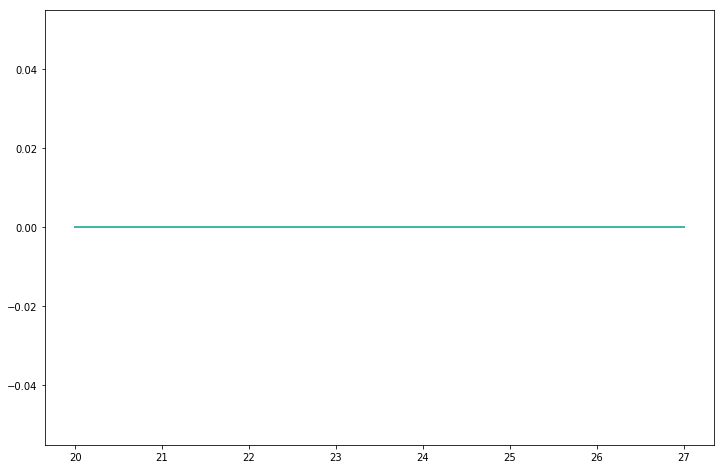

In [26]:
plt.figure(figsize= (12,8))
a = 400
num_samples = 50
GP = np.zeros(shape = (num_samples, xnorm.shape[0]))
for i in xrange(a, a + num_samples):
    GaussMean.randomize()
    g = GaussMean.compute_mean(xnorm[:,None])
    plt.plot(x, g)
    #plt.ylim(0.1, 4.6)
    #GP[i,:] = g[:,0]

In [27]:
GaussMean.lengthscale = 0.2
GaussMean.lengthscale.fixed = True
GaussMean.signal_variance = 4.
GaussMean.signal_variance.fixed = True

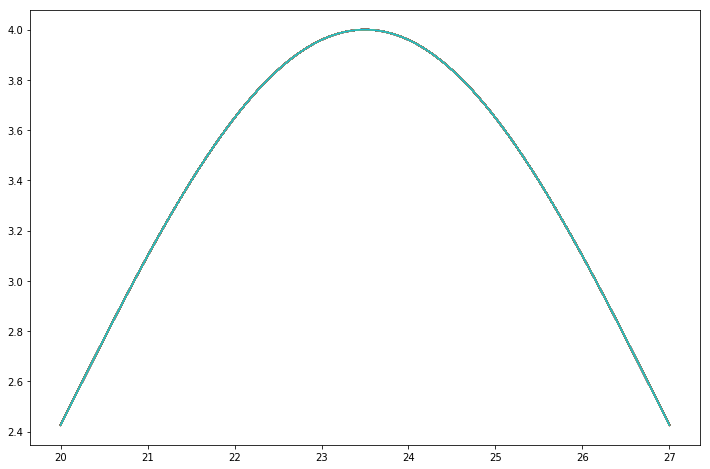

In [29]:
plt.figure(figsize= (12,8))
a = 400
num_samples = 100
GP = np.zeros(shape = (num_samples, xnorm.shape[0]))
for i in xrange(a, a + num_samples):
    GaussMean.randomize()
    g = GaussMean.compute_mean(xnorm[:,None])
    plt.plot(x, g)
    #plt.ylim(0.1, 4.6)
    #GP[i,:] = g[:,0]